<a href="https://colab.research.google.com/github/rodrigodesouza7/data-observability-platform/blob/main/relatorio_qualidade_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# 📊 ANÁLISE DE ERROS DETECTADOS
# Módulo para visualização da distribuição dos erros de validação
# ============================================================

In [ ]:
# ============================================================
# 📚 1. BIBLIOTECAS
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter



# ============================================================
# 📂 2. LEITURA DO ARQUIVO DE ERROS
# ============================================================


In [ ]:

# Lê o CSV contendo registros que falharam em pelo menos uma regra de validação
caminho_arquivo = "erros_detectados.csv"
df_erros = pd.read_csv(caminho_arquivo)

# Verificação de leitura
print(f"✅ Registros carregados com erro: {len(df_erros)}")



✅ Registros carregados com erro: 125


# ============================================================
# 🧪 3. PRÉ-PROCESSAMENTO DOS ERROS
# ============================================================

In [ ]:
# ============================================================
# 🧪 3. PRÉ-PROCESSAMENTO DOS ERROS
# ============================================================

# A coluna 'erros' contém múltiplos erros por linha separados por vírgula
# Precisamos "explodir" esses erros em linhas para contagem

# Lista com todos os erros individuais
todos_erros = []

for erros in df_erros["erros"]:
    tipos = [e.strip() for e in erros.split(",") if e.strip()]
    todos_erros.extend(tipos)

# Contar frequência de cada tipo de erro
contagem_erros = Counter(todos_erros)
df_contagem = pd.DataFrame(contagem_erros.items(), columns=["Tipo de Erro", "Ocorrências"])
df_contagem = df_contagem.sort_values(by="Ocorrências", ascending=False)

# Exibir os dados tabulares
print("\n📌 Distribuição dos erros detectados:")
display(df_contagem)



📌 Distribuição dos erros detectados:


,Tipo de Erro,Ocorrências
0,valor_invalido,35
1,data_invalida,31
2,email_invalido,22
3,categoria_invalida,20
4,status_invalido,17



# ============================================================
# 📊 4. VISUALIZAÇÃO GRÁFICA
# ============================================================

<ipython-input-4-4f114aeaf852>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


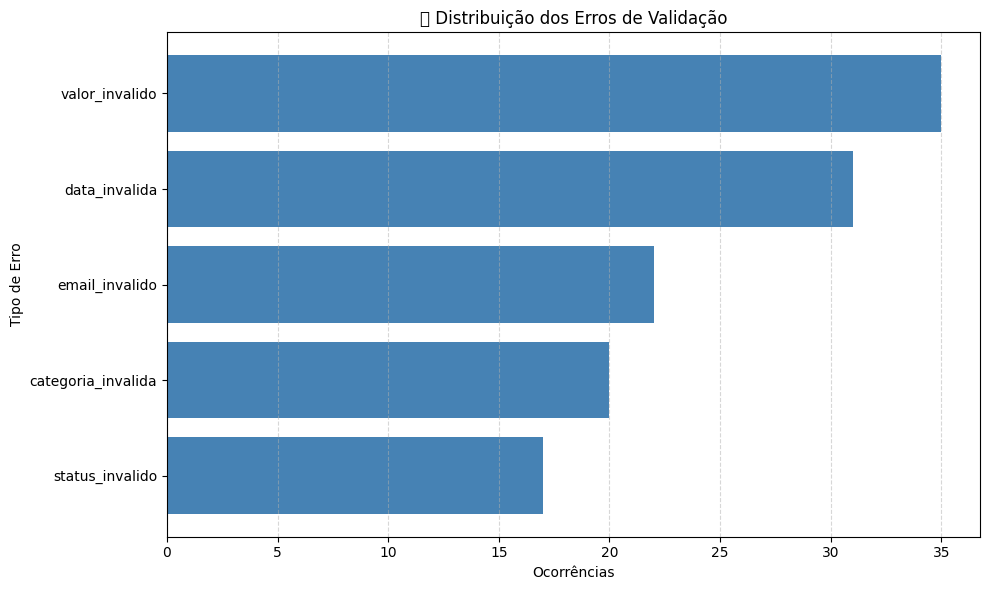

In [ ]:
# Estilo e tamanho do gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_contagem["Tipo de Erro"], df_contagem["Ocorrências"], color="steelblue")
plt.xlabel("Ocorrências")
plt.ylabel("Tipo de Erro")
plt.title("📊 Distribuição dos Erros de Validação")
plt.gca().invert_yaxis()  # Tipo mais frequente no topo
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()